In [110]:
import mlflow

mlflow.set_experiment('voting-record')
query = 'tags."function" = "voting_record_test"'
df = mlflow.search_runs(filter_string=query)
client = mlflow.tracking.MlflowClient()

In [111]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rc('font', family='FreeSerif') 
matplotlib.rc('font', serif='regular')
matplotlib.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (7,5)
import numpy as np
markers = ['o','*', 'v', '^', '<', '>', '8', 's', 'p', 'h']

/home/hao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  after removing the cwd from sys.path.


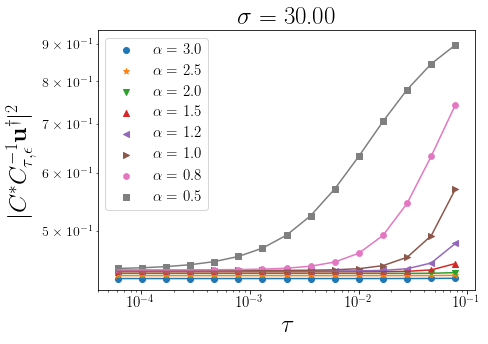

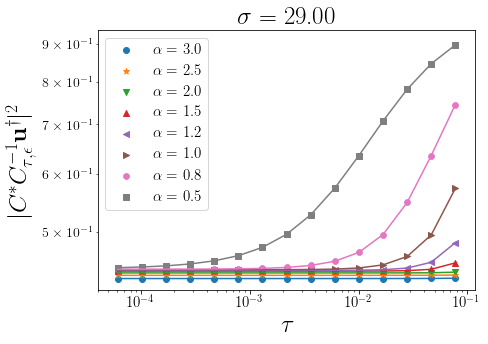

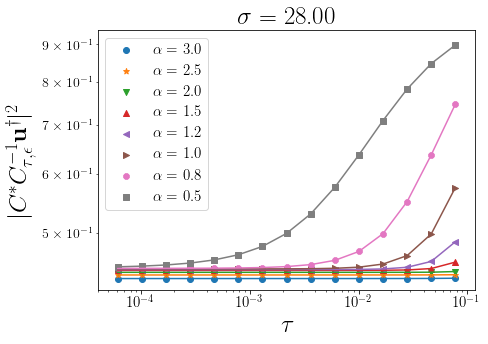

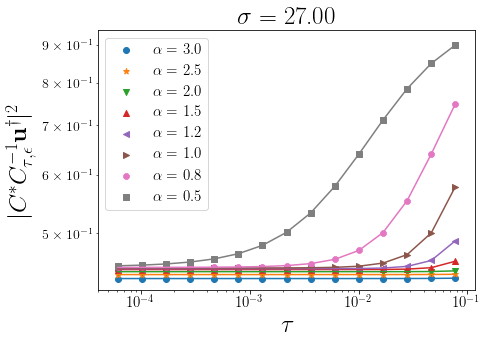

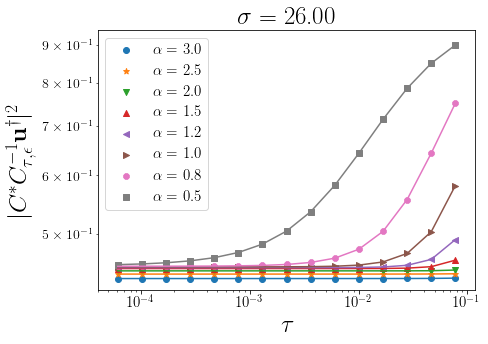

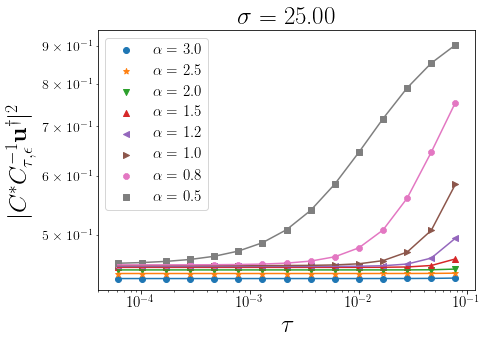

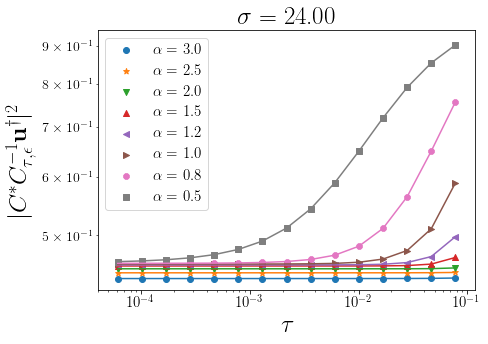

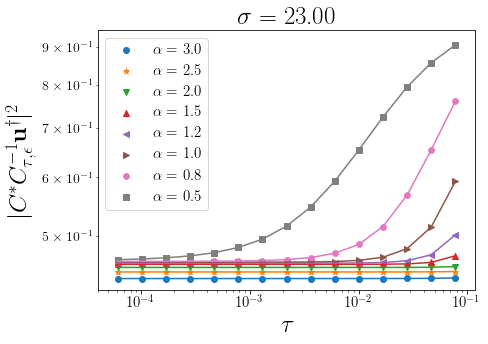

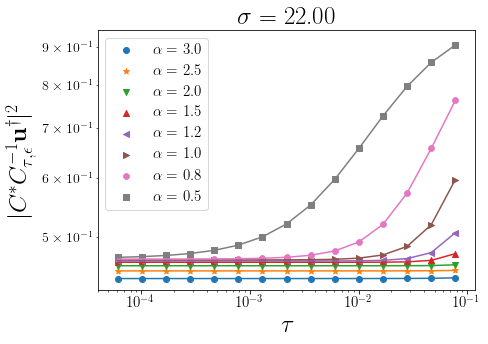

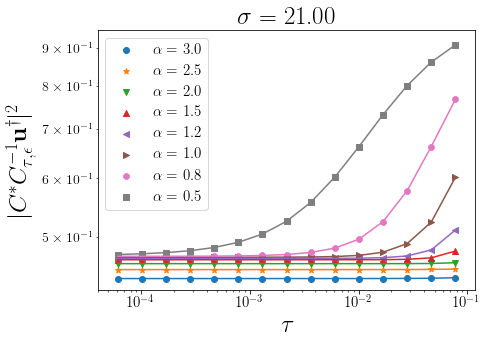

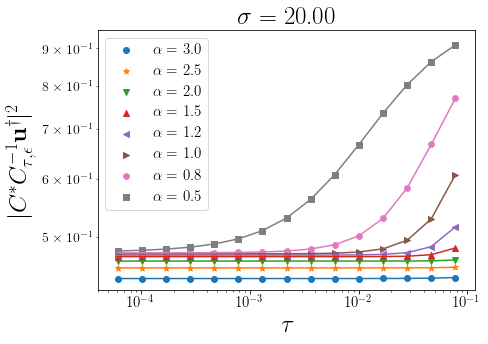

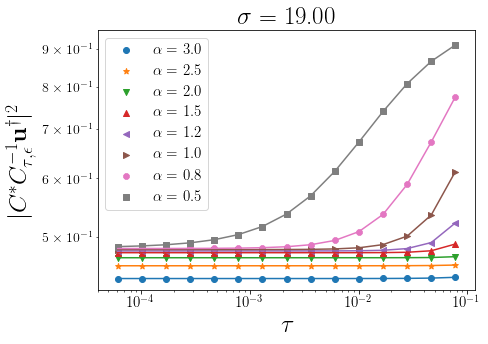

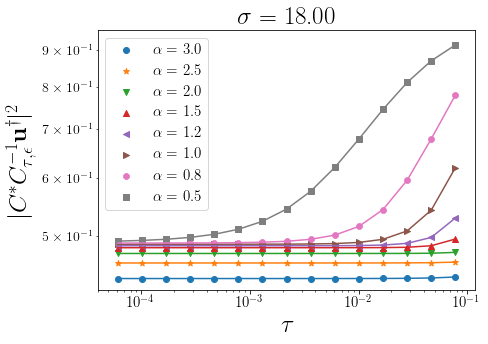

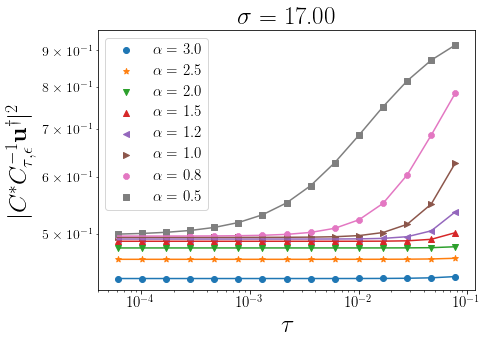

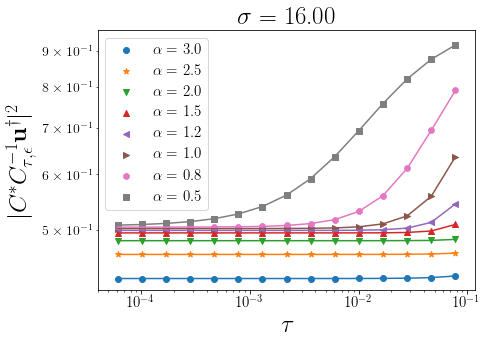

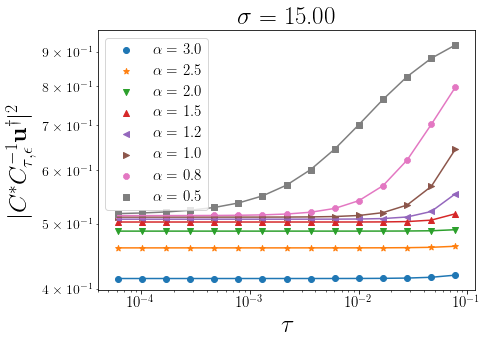

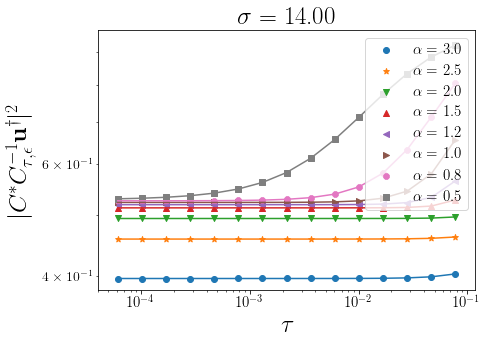

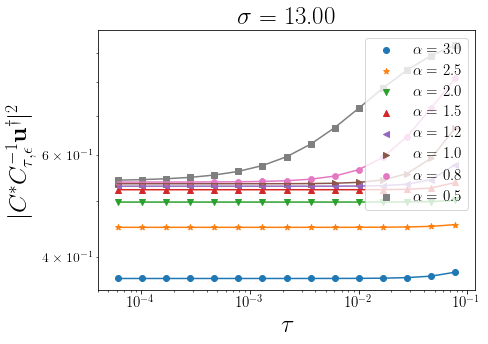

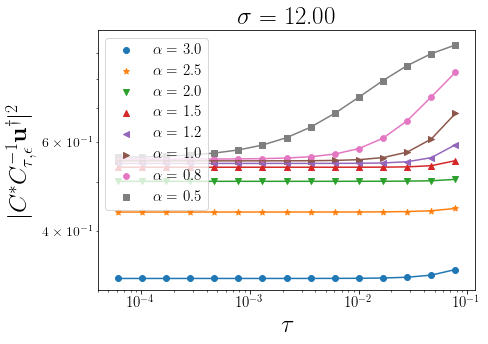

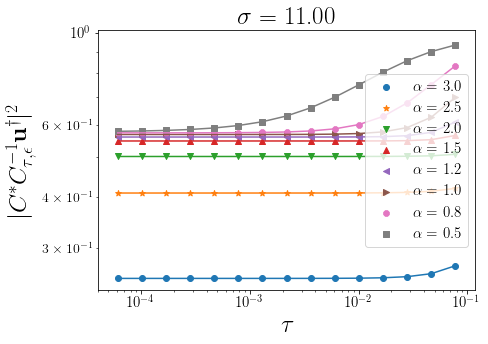

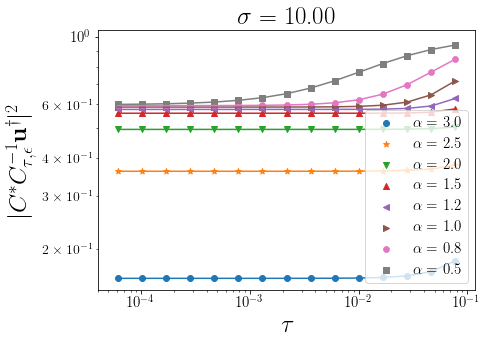

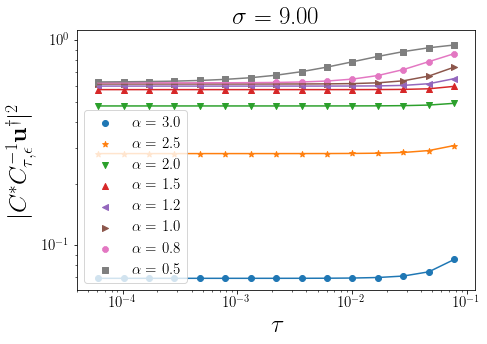

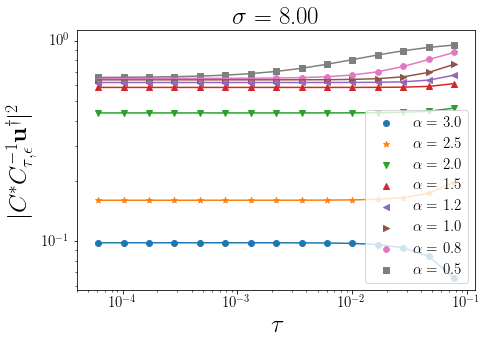

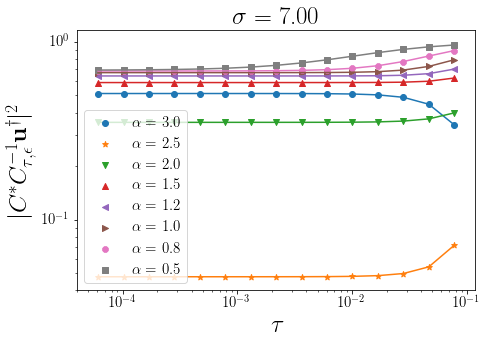

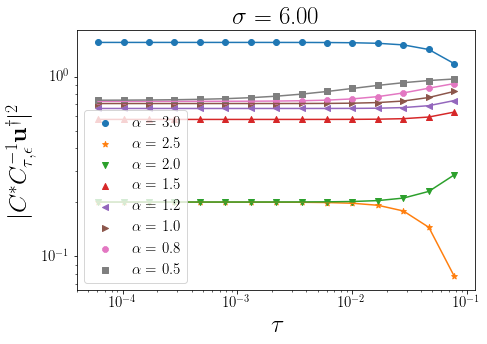

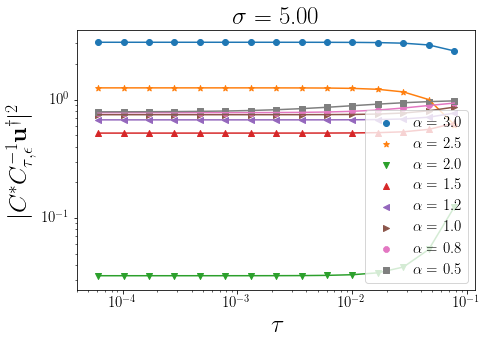

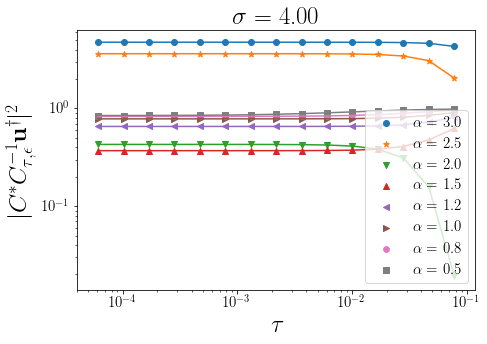

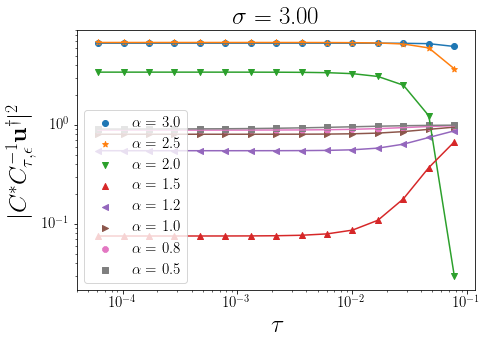

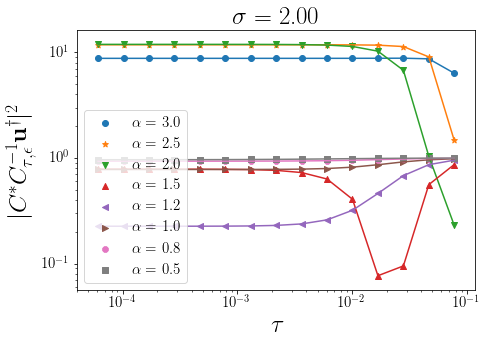

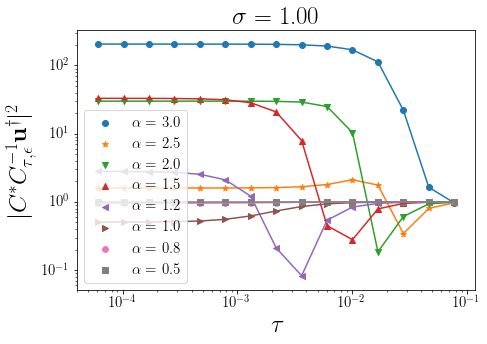

In [121]:
T = np.power(0.6, range(5, 20))


SIGMAS = df['params.sigma'].unique()

for sigma in SIGMAS:
    fixed_sigma = df[df['params.sigma'] == sigma]
    i = 0
    fig = plt.figure()
    ax = fig.gca()
    for idx, row in fixed_sigma.iterrows():
        run_id = row['run_id']
        data = [metric.value for metric in client.get_metric_history(run_id, 'bias')]
        alpha = row['params.alpha']
        ax.loglog(T, data)
        ax.scatter(T, data, marker=markers[i], label=r'$\alpha =$ %2.1f'% float(alpha))
        i += 1
    plt.legend(fontsize=15)
    plt.xlabel(r'$\tau$', fontsize=25)
    plt.ylabel(r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{u^\dagger}|^2$', fontsize=25)
    plt.title(r'$\sigma = $ %2.2f'% float(sigma), fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.tight_layout()
    plt.show()

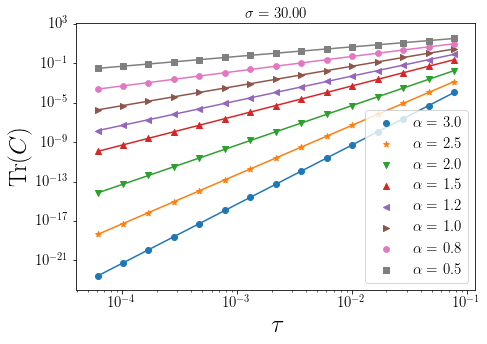

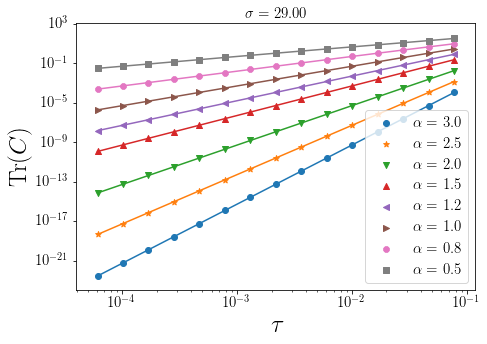

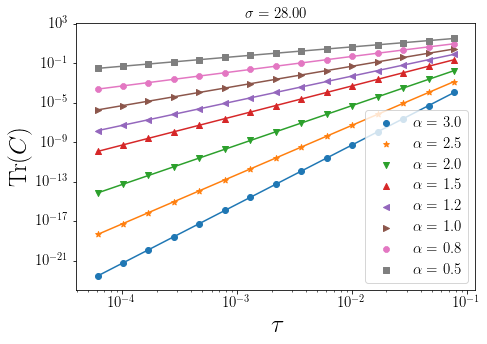

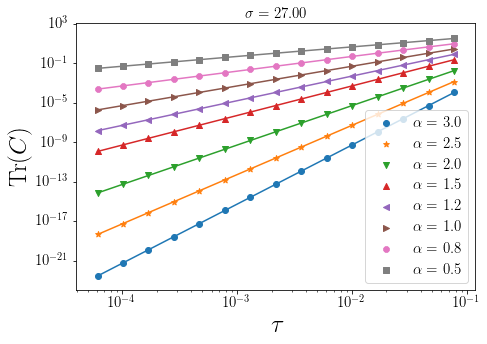

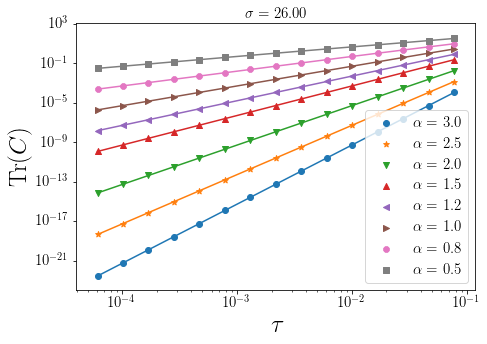

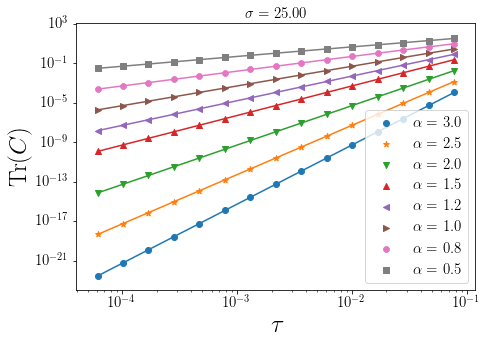

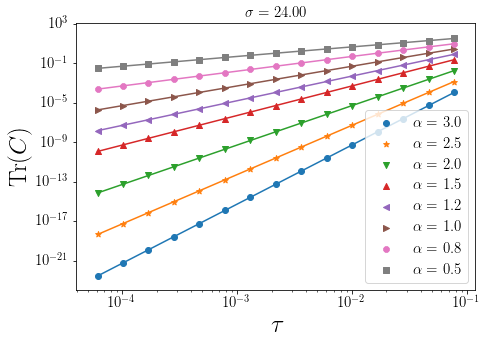

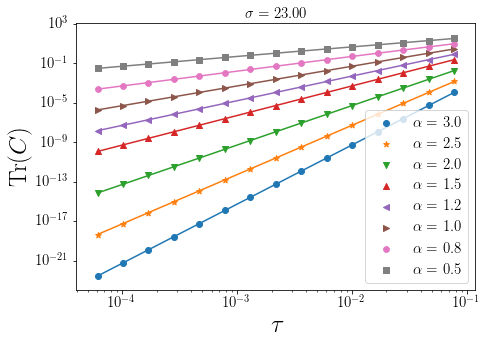

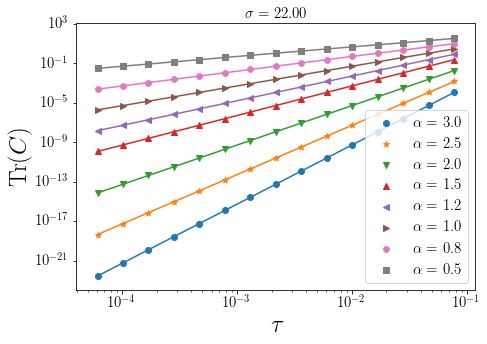

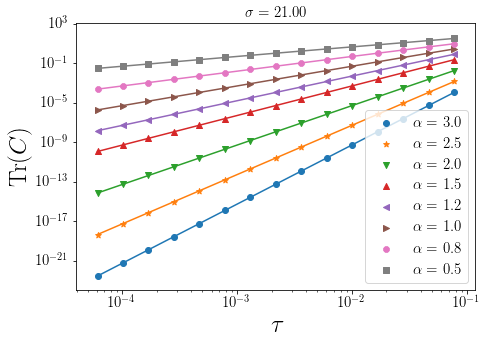

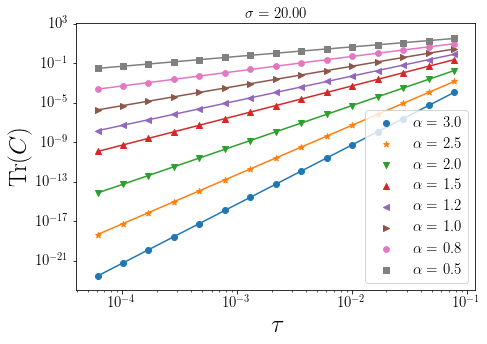

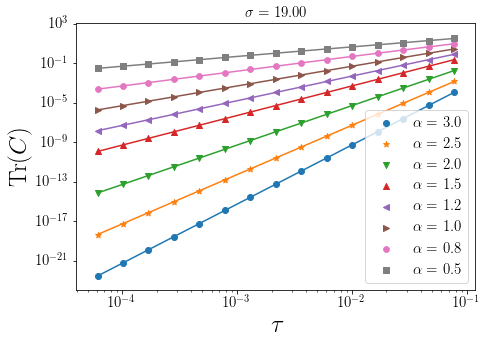

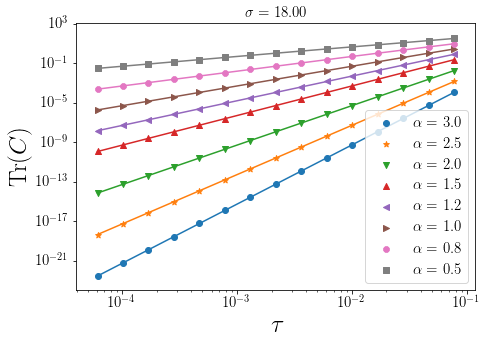

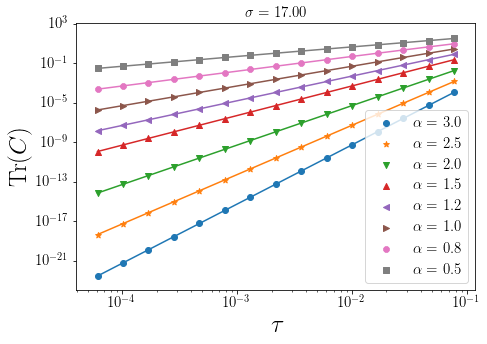

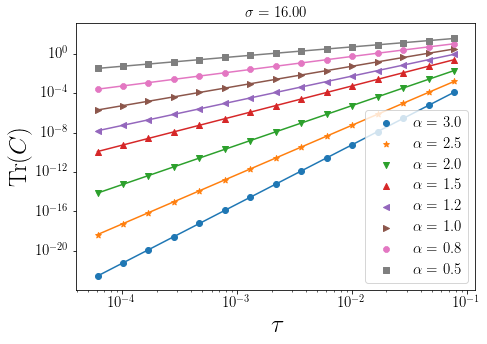

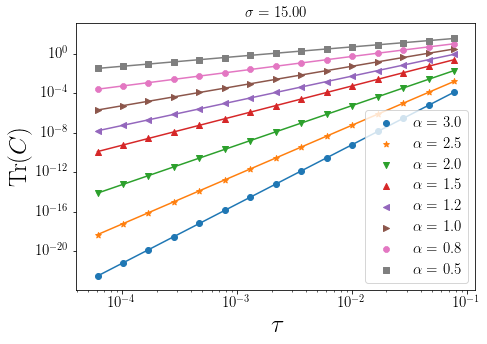

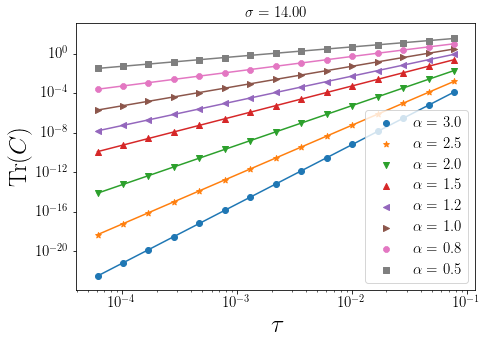

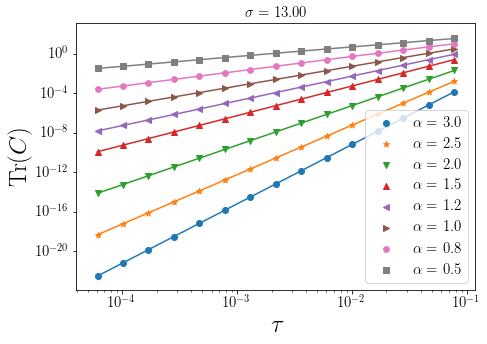

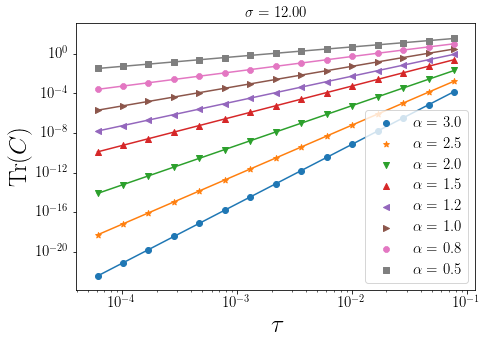

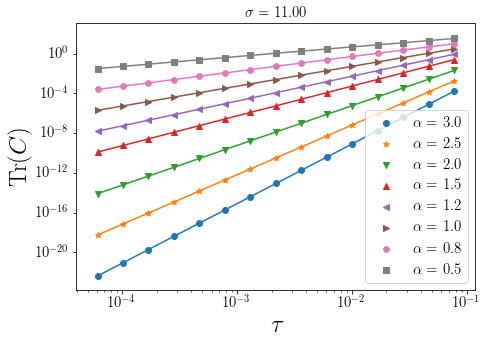

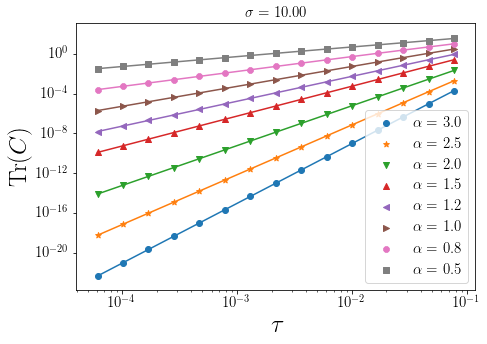

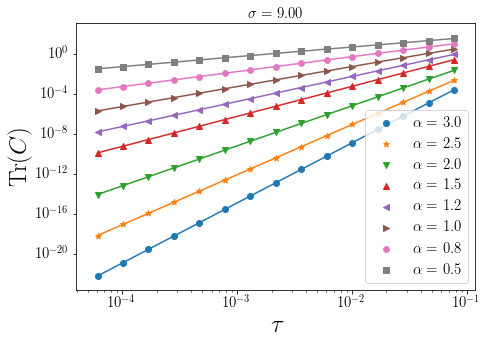

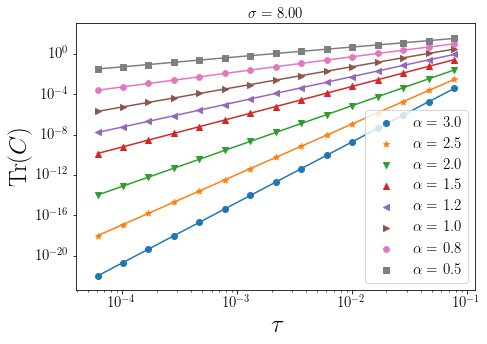

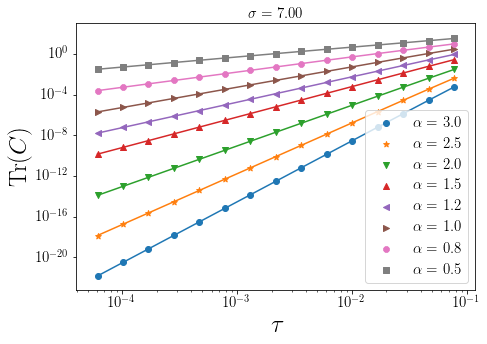

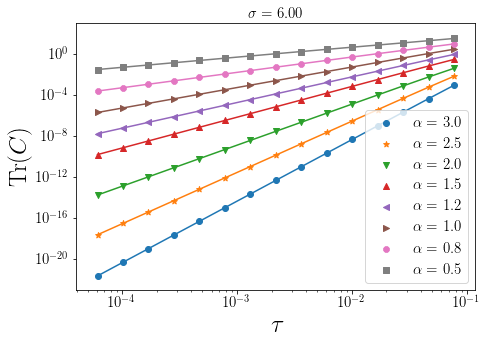

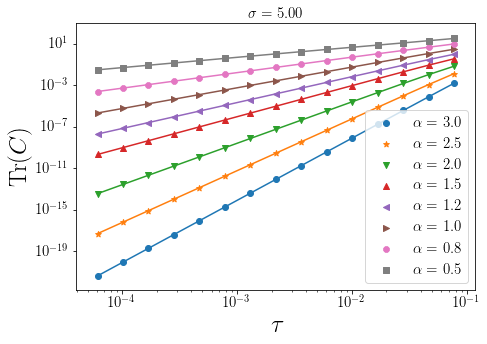

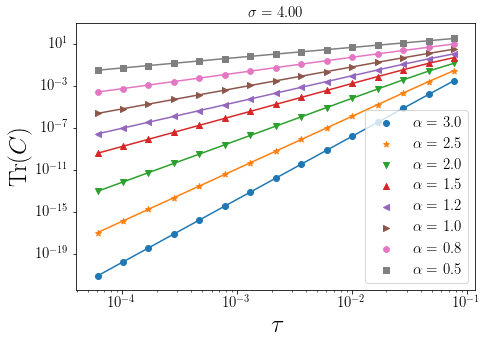

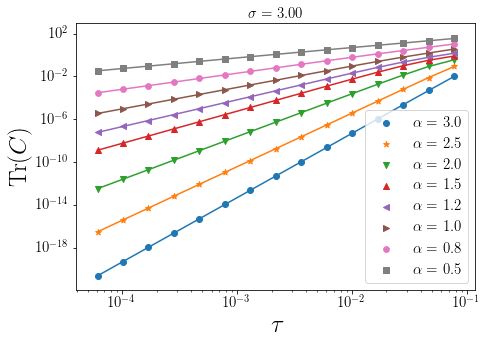

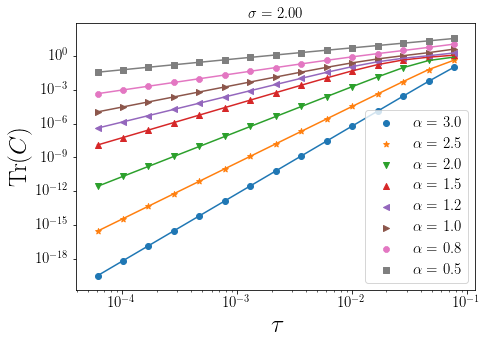

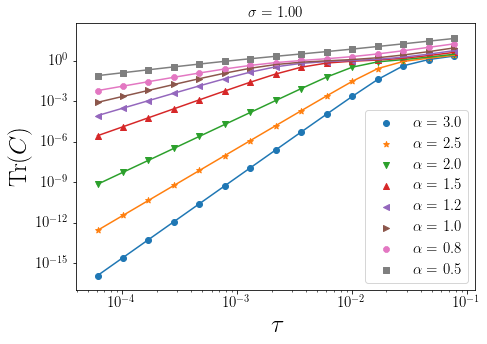

In [115]:
T = np.power(0.6, range(5, 20))


SIGMAS = df['params.sigma'].unique()

for sigma in SIGMAS:
    fixed_sigma = df[df['params.sigma'] == sigma]
    i = 0
    fig = plt.figure()
    ax = fig.gca()
    for idx, row in fixed_sigma.iterrows():
        run_id = row['run_id']
        data = [metric.value for metric in client.get_metric_history(run_id, 'trc')]
        alpha = row['params.alpha']
        ax.loglog(T, data)
        ax.scatter(T, data, marker=markers[i], label=r'$\alpha =$ %2.1f'% float(alpha))
        i += 1
    plt.legend(fontsize=15)
    plt.xlabel(r'$\tau$', fontsize=25)
    plt.ylabel(r'$\mathrm{Tr}(C)$', fontsize=25)
    plt.title(r'$\sigma = $ %2.2f'% float(sigma), fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.tight_layout()
    plt.show()

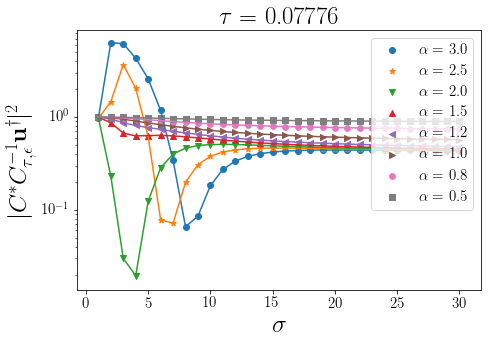

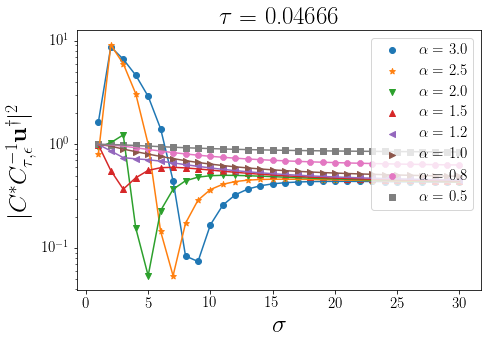

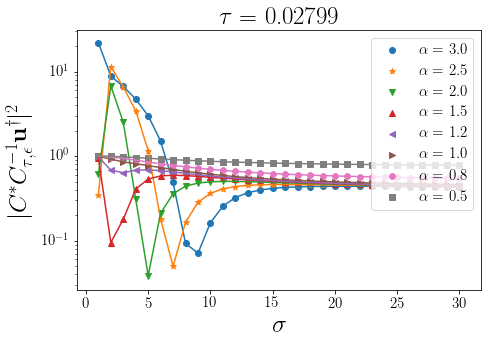

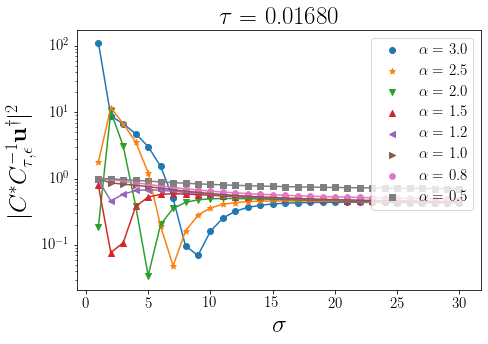

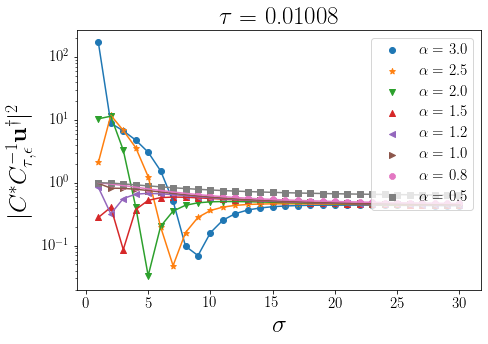

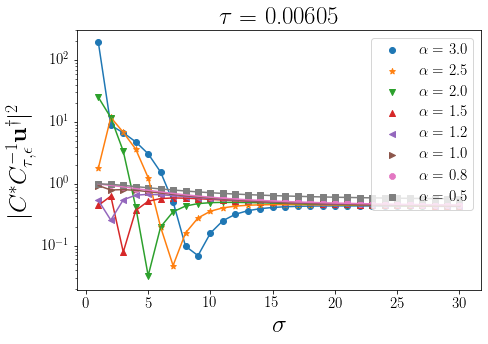

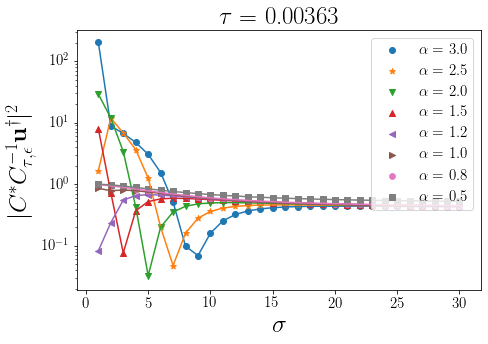

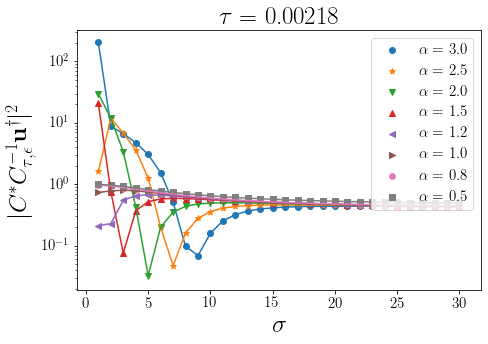

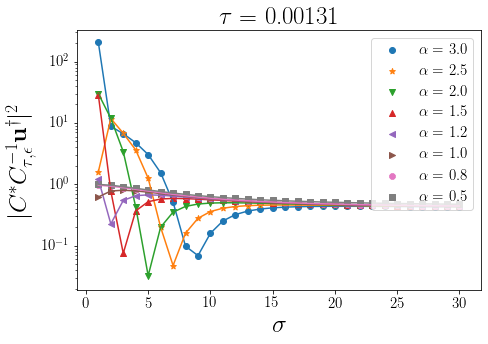

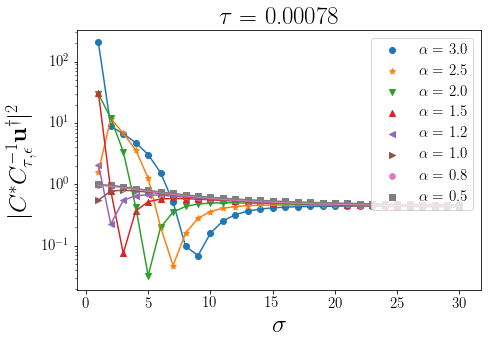

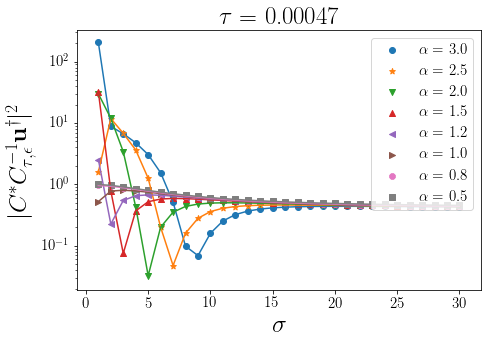

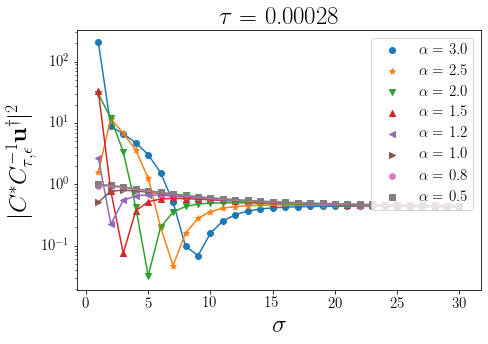

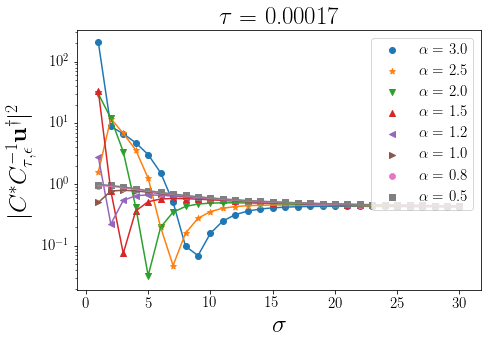

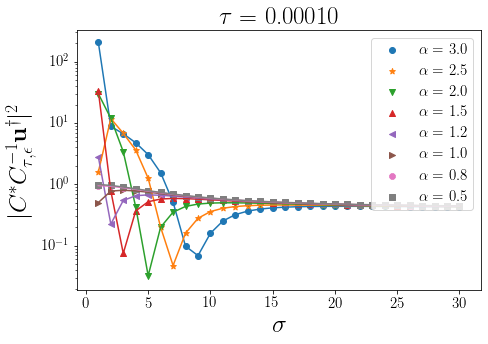

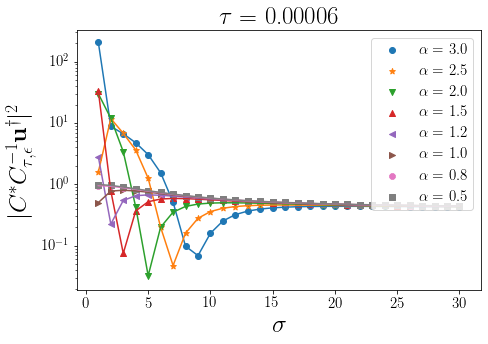

In [118]:
T = np.power(0.6, range(5, 20))

ALPHAS = df['params.alpha'].unique()


for j in range(len(T)):
    i = 0
    fig = plt.figure()
    ax = fig.gca()
    for alpha in ALPHAS:
        fixed_alpha = df[df['params.alpha'] == alpha]
        data = []
        sigma = []
        for idx, row in fixed_alpha.iterrows():
            run_id = row['run_id']
            data.append(client.get_metric_history(run_id, 'bias')[j].value)
            sigma.append(float(row['params.sigma']))
        ax.plot(sigma, data)
        ax.scatter(sigma, data, marker=markers[i], label=r'$\alpha =$ %2.1f'% float(alpha))
        ax.set_yscale('log')
        i += 1
    plt.legend(fontsize=15,loc='upper right')
    plt.xlabel(r'$\sigma$', fontsize=25)
    plt.ylabel(r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{u^\dagger}|^2$', fontsize=25)
    plt.title(r'$\tau = $ %2.5f'% T[j], fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.tight_layout()
    plt.show()

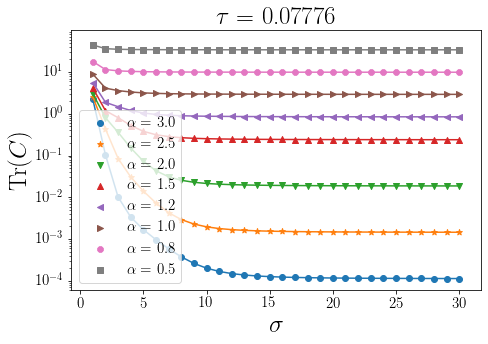

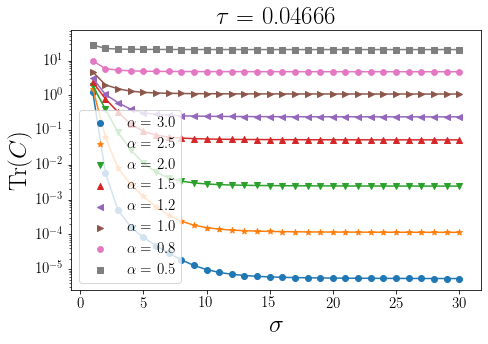

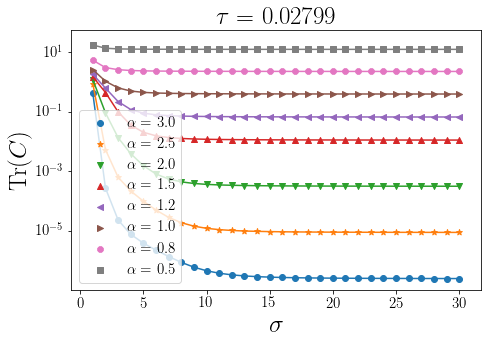

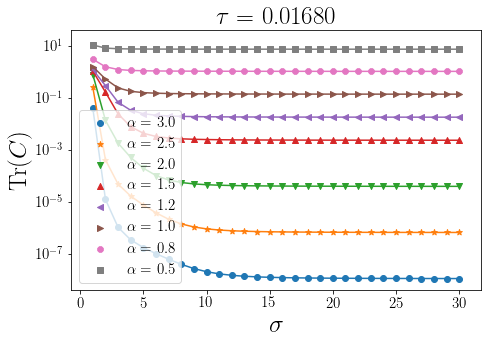

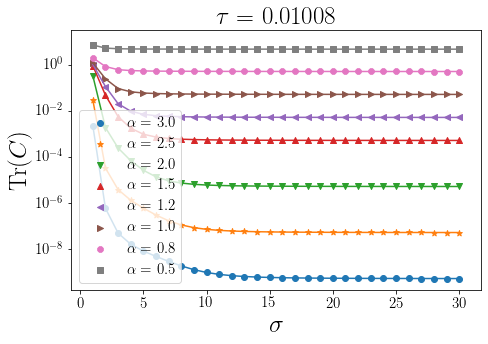

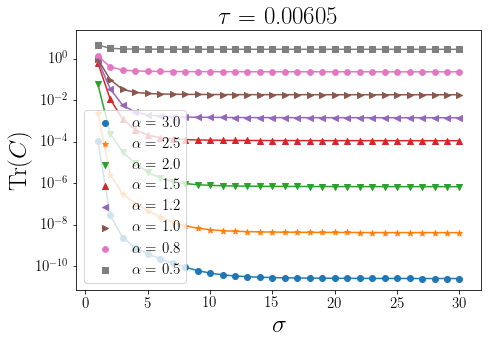

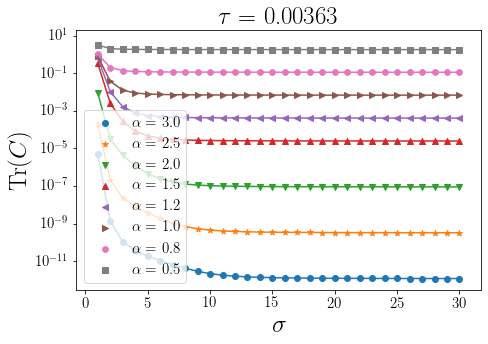

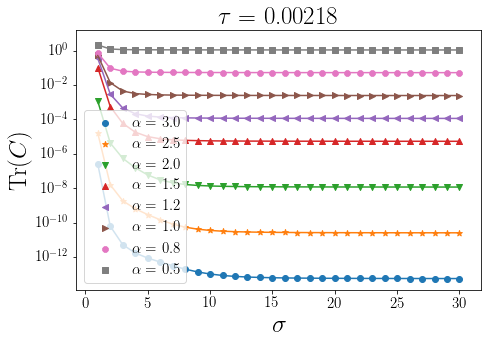

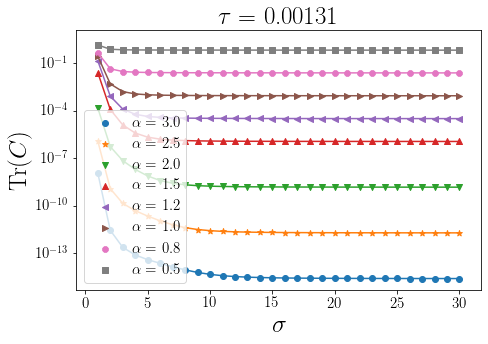

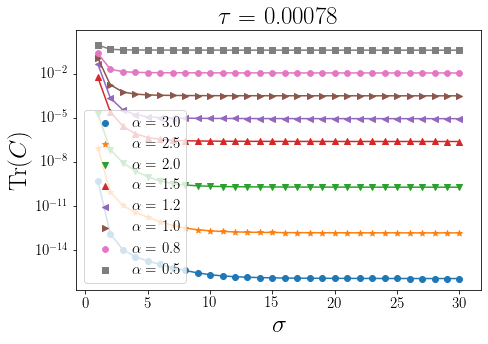

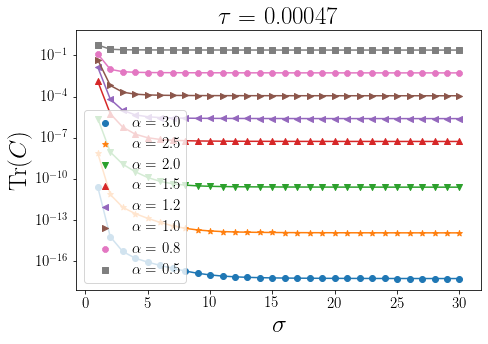

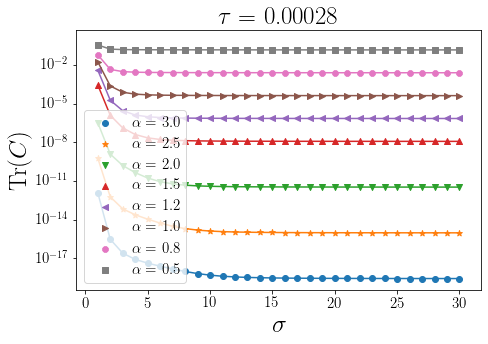

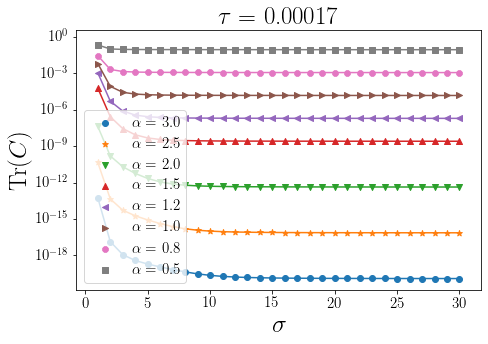

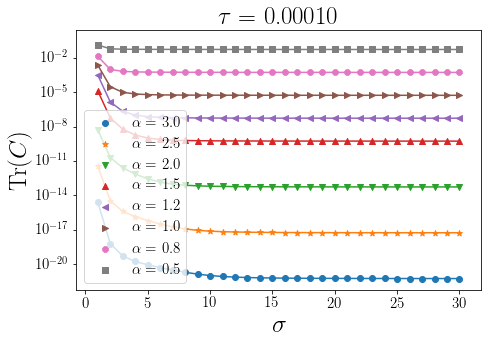

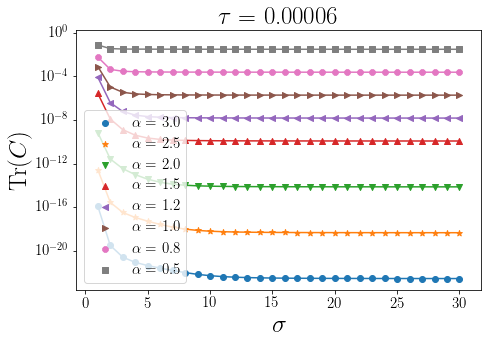

In [120]:
T = np.power(0.6, range(5, 20))

ALPHAS = df['params.alpha'].unique()


for j in range(len(T)):
    i = 0
    fig = plt.figure()
    ax = fig.gca()
    for alpha in ALPHAS:
        fixed_alpha = df[df['params.alpha'] == alpha]
        data = []
        sigma = []
        for idx, row in fixed_alpha.iterrows():
            run_id = row['run_id']
            data.append(client.get_metric_history(run_id, 'trc')[j].value)
            sigma.append(float(row['params.sigma']))
        ax.plot(sigma, data)
        ax.scatter(sigma, data, marker=markers[i], label=r'$\alpha =$ %2.1f'% float(alpha))
        ax.set_yscale('log')
        i += 1
    plt.legend(fontsize=15)
    plt.xlabel(r'$\sigma$', fontsize=25)
    plt.ylabel(r'$\mathrm{Tr}(C)$', fontsize=25)
    plt.title(r'$\tau = $ %2.5f'% T[j], fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.tight_layout()
    plt.show()

In [109]:
from util.mlflow_util import load_uri
from datasets.Graph_manager import Graph_manager
data = load_uri('file:///home/hao/Desktop/working-directory/UQ_Python/mlruns/1/60c3b0d120974d9ba82c41edd07df66f/artifacts/data',
         'data.npz')
X = data['X']
gm = Graph_manager(None, X.shape[0])
A = gm.sqdist(X.T, X.T)
print(np.mean(A))

29.08653719117453
